**NLTK**

In [37]:
import nltk

In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import wordnet
from nltk import pos_tag,ne_chunk

In [39]:
sent="Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data"

**REMOVE STOPWORDS**

In [40]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
def stopwords_rem(text):
  stop=set(stopwords.words("english"))
  word_tokens=word_tokenize(text)
  w=[word for word in word_tokens if word not in stop]
  return w

In [42]:
stopwords_rem(sent)

['Natural',
 'language',
 'processing',
 'subfield',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'artificial',
 'intelligence',
 'concerned',
 'interactions',
 'computers',
 'human',
 'language',
 ',',
 'particular',
 'program',
 'computers',
 'process',
 'analyze',
 'large',
 'amounts',
 'natural',
 'language',
 'data']

**STEMMING AND LEMMATIZATION**

In [43]:
stem1=PorterStemmer()

In [44]:
def s_words(text):
  word_tokens=word_tokenize(text)
  s=[stem1.stem(word) for word in word_tokens]
  return s

In [45]:
s_words(sent)

['natur',
 'languag',
 'process',
 'is',
 'a',
 'subfield',
 'of',
 'linguist',
 ',',
 'comput',
 'scienc',
 ',',
 'and',
 'artifici',
 'intellig',
 'concern',
 'with',
 'the',
 'interact',
 'between',
 'comput',
 'and',
 'human',
 'languag',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'comput',
 'to',
 'process',
 'and',
 'analyz',
 'larg',
 'amount',
 'of',
 'natur',
 'languag',
 'data']

In [46]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
lemma=wordnet.WordNetLemmatizer()

In [48]:
def l_words(text):
   word_tokens=word_tokenize(text)
   s=[lemma.lemmatize(word,pos='v') for word in word_tokens]
   return s

In [49]:
l_words(sent)

['Natural',
 'language',
 'process',
 'be',
 'a',
 'subfield',
 'of',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concern',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 'language',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amount',
 'of',
 'natural',
 'language',
 'data']

**POS TAGGING**

In [50]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
def pos_tagg(text):
  word_tokens=word_tokenize(text)
  return pos_tag(word_tokens)

In [52]:
pos_tagg(sent)

[('Natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('subfield', 'NN'),
 ('of', 'IN'),
 ('linguistics', 'NNS'),
 (',', ','),
 ('computer', 'NN'),
 ('science', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('artificial', 'JJ'),
 ('intelligence', 'NN'),
 ('concerned', 'VBN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('interactions', 'NNS'),
 ('between', 'IN'),
 ('computers', 'NNS'),
 ('and', 'CC'),
 ('human', 'JJ'),
 ('language', 'NN'),
 (',', ','),
 ('in', 'IN'),
 ('particular', 'JJ'),
 ('how', 'WRB'),
 ('to', 'TO'),
 ('program', 'NN'),
 ('computers', 'NNS'),
 ('to', 'TO'),
 ('process', 'VB'),
 ('and', 'CC'),
 ('analyze', 'VB'),
 ('large', 'JJ'),
 ('amounts', 'NNS'),
 ('of', 'IN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('data', 'NNS')]

**CHUNKING**

In [53]:
def chunking(text,gram):
  word_tokens=word_tokenize(text)
  word_pos=pos_tag(word_tokens)
  chunk_parser=nltk.RegexpParser(gram)
  tree=chunk_parser.parse(word_pos)

  for subtree in tree.subtrees():
    print(subtree)

In [54]:
gram="NP:{<DT>?<JJ>*<NN>}"

In [55]:
chunking(sent,gram)

(S
  (NP Natural/JJ language/NN)
  (NP processing/NN)
  is/VBZ
  (NP a/DT subfield/NN)
  of/IN
  linguistics/NNS
  ,/,
  (NP computer/NN)
  (NP science/NN)
  ,/,
  and/CC
  (NP artificial/JJ intelligence/NN)
  concerned/VBN
  with/IN
  the/DT
  interactions/NNS
  between/IN
  computers/NNS
  and/CC
  (NP human/JJ language/NN)
  ,/,
  in/IN
  particular/JJ
  how/WRB
  to/TO
  (NP program/NN)
  computers/NNS
  to/TO
  process/VB
  and/CC
  analyze/VB
  large/JJ
  amounts/NNS
  of/IN
  (NP natural/JJ language/NN)
  data/NNS)
(NP Natural/JJ language/NN)
(NP processing/NN)
(NP a/DT subfield/NN)
(NP computer/NN)
(NP science/NN)
(NP artificial/JJ intelligence/NN)
(NP human/JJ language/NN)
(NP program/NN)
(NP natural/JJ language/NN)


**NAMED ENTITY RECOGNITION**

In [56]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [57]:
def ner(text):
  word_token=word_tokenize(text)
  word_pos=pos_tag(word_token)
  print(ne_chunk(word_pos))


In [58]:
ner(sent)

(S
  Natural/JJ
  language/NN
  processing/NN
  is/VBZ
  a/DT
  subfield/NN
  of/IN
  linguistics/NNS
  ,/,
  computer/NN
  science/NN
  ,/,
  and/CC
  artificial/JJ
  intelligence/NN
  concerned/VBN
  with/IN
  the/DT
  interactions/NNS
  between/IN
  computers/NNS
  and/CC
  human/JJ
  language/NN
  ,/,
  in/IN
  particular/JJ
  how/WRB
  to/TO
  program/NN
  computers/NNS
  to/TO
  process/VB
  and/CC
  analyze/VB
  large/JJ
  amounts/NNS
  of/IN
  natural/JJ
  language/NN
  data/NNS)


**REGULAR EXPRESSION**

In [59]:
freq=nltk.FreqDist(word_tokenize(sent))
print(freq)

<FreqDist with 32 samples and 41 outcomes>


In [60]:
word=freq.keys()
print(type(word))

<class 'dict_keys'>


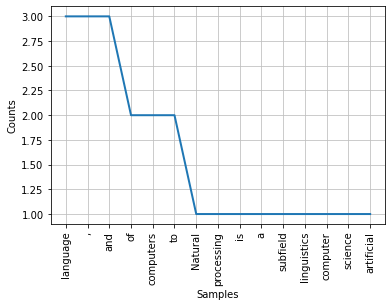

In [61]:
freq.plot(15)

**TEXT PREPROCESSING**

In [62]:
def lower_text(text):
  return text.lower()

In [63]:
lower_text(sent)

'natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data'

**SPACY**

In [64]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [65]:
s=nlp(sent)

In [66]:
s

Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data

In [67]:
for t in s:
  print(t.text,t.pos_,t.dep_,t.is_alpha,t.is_stop)

Natural ADJ amod True False
language NOUN compound True False
processing NOUN nsubj True False
is AUX ROOT True True
a DET det True True
subfield NOUN attr True False
of ADP prep True True
linguistics NOUN pobj True False
, PUNCT punct False False
computer NOUN compound True False
science NOUN conj True False
, PUNCT punct False False
and CCONJ cc True True
artificial ADJ amod True False
intelligence NOUN conj True False
concerned VERB acl True False
with ADP prep True True
the DET det True True
interactions NOUN pobj True False
between ADP prep True True
computers NOUN pobj True False
and CCONJ cc True True
human ADJ amod True False
language NOUN conj True False
, PUNCT punct False False
in ADP prep True True
particular ADJ amod True False
how ADV advmod True True
to PART aux True True
program VERB advcl True False
computers NOUN dobj True False
to PART aux True True
process VERB advcl True False
and CCONJ cc True True
analyze VERB conj True False
large ADJ amod True False
amounts NOU

**WORD VECTOR AND SIMILARITY**

In [69]:
for t in s:
  print(t.text,t.has_vector,t.vector_norm,t.is_oov)

Natural True 20.196342 True
language True 19.99277 True
processing True 20.915106 True
is True 23.867239 True
a True 24.376287 True
subfield True 20.738401 True
of True 23.69163 True
linguistics True 18.988424 True
, True 21.2879 True
computer True 17.847494 True
science True 19.385683 True
, True 21.427887 True
and True 21.759138 True
artificial True 16.728458 True
intelligence True 20.10162 True
concerned True 22.512169 True
with True 22.836433 True
the True 21.894686 True
interactions True 20.627556 True
between True 23.32935 True
computers True 21.553305 True
and True 25.832891 True
human True 19.2886 True
language True 18.689667 True
, True 20.034212 True
in True 19.430323 True
particular True 19.136065 True
how True 23.780113 True
to True 21.043406 True
program True 22.349049 True
computers True 22.259478 True
to True 21.541782 True
process True 23.407051 True
and True 21.708694 True
analyze True 23.175976 True
large True 22.716946 True
amounts True 21.987707 True
of True 24.2045

In [72]:
for i in s:
  for j in s:
    print(i.text,j.text,i.similarity(j))

Natural Natural 1.0
Natural language 0.2327552
Natural processing 0.15312143
Natural is -0.053316884
Natural a 0.20215963
Natural subfield 0.22730996
Natural of 0.0466731
Natural linguistics 0.083419904
Natural , -0.16609031
Natural computer 0.28875282
Natural science 0.06670969
Natural , -0.08806204
Natural and 0.037292175
Natural artificial 0.553935


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

Natural intelligence 0.09234818
Natural concerned 0.19544762
Natural with -0.1808558
Natural the 0.1271408
Natural interactions 0.061770007
Natural between -0.12940513
Natural computers 0.15471095
Natural and 0.04834087
Natural human 0.47642127
Natural language 0.21891811
Natural , -0.162128
Natural in -0.048908453
Natural particular 0.42797878
Natural how -0.118350744


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

Natural to -0.015627053
Natural program 0.26708466
Natural computers 0.028877376
Natural to -0.057456117
Natural process 0.17501207
Natural and 0.045401562
Natural analyze 0.14209755
Natural large 0.50203514
Natural amounts 0.13188495
Natural of 0.031306267
Natural natural 0.710214
Natural language 0.29563403
Natural data 0.018503483
language Natural 0.2327552
language language 1.0
language processing 0.3830755
language is -0.008400002


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language a 0.090040654
language subfield 0.4385711
language of 0.23293181
language linguistics 0.35777703
language , 0.28181118
language computer 0.4250504
language science 0.48618028
language , 0.17593344
language and 0.23027219
language artificial 0.33950025
language intelligence 0.46871084
language concerned 0.11809235
language with 0.11637012
language the 0.13008118


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language interactions 0.1358984
language between 0.052253243
language computers 0.33292058
language and 0.20619746
language human 0.47277388
language language 1.0
language , -0.012806509
language in 0.1340149
language particular 0.3079268
language how 0.028898614
language to 0.13207953
language program 0.3033203
language computers 0.17824365
language to 0.058060315
language process 0.37370533
language and 0.15863504
language analyze 0.092320755


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language large 0.12902708
language amounts 0.274115
language of 0.22657353
language natural 0.28757563
language language 1.0
language data 0.34930208
processing Natural 0.15312143
processing language 0.3830755
processing processing 1.0
processing is 0.20013598
processing a 0.09731746
processing subfield 0.5299418
processing of 0.105112374
processing linguistics 0.2562995
processing , 0.027627708
processing computer 0.41763476


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

processing science 0.54789126
processing , 0.17590159
processing and 0.013110307
processing artificial 0.27812254
processing intelligence 0.45279375
processing concerned 0.004284136
processing with -0.009201182
processing the 0.051616266
processing interactions 0.118496954
processing between -0.05173365
processing computers 0.10650882
processing and 0.029775012
processing human 0.0834615
processing language 0.40116328
processing , -0.00042725538


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

processing in -0.12682699
processing particular 0.1503428
processing how 0.08050063
processing to 0.048992943
processing program 0.3937845
processing computers 0.10085006
processing to -0.013723896
processing process 0.2955232
processing and -0.056728054
processing analyze 0.118157655
processing large 0.038650922
processing amounts 0.18096128
processing of 0.0657985
processing natural 0.1414086
processing language 0.31405726
processing data 0.23145576


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

is Natural -0.053316884
is language -0.008400002
is processing 0.20013598
is is 1.0
is a 0.028692609
is subfield 0.12962922
is of 0.14472975
is linguistics -0.09540334
is , -0.12496843
is computer -0.058413923
is science 0.07958379
is , 0.17137162
is and 0.08410338
is artificial 0.12708856
is 

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

intelligence 0.06429651
is concerned -0.23313254
is with 0.17391865
is the -0.047000453
is interactions -0.043526474
is between 0.049171746
is computers -0.034943342
is and 0.015736206
is human -0.21160313
is language 0.02028238
is , 0.00030257975
is in 0.098557636
is particular 0.059333682
is how -0.075464286
is to 0.070481904


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

is program 0.10766661
is computers 0.19341247
is to -0.013750265
is process 0.10393567
is and -0.086610146
is analyze 0.19779363
is large -0.069541335
is amounts 0.18023711
is of 0.18146059
is natural -0.083906166
is language -0.07632393
is data 0.1424119
a Natural 0.20215963
a language 0.090040654
a processing 0.09731746
a is 0.028692609
a a 1.0
a subfield 0.30856687


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

a of 0.12714821
a linguistics 0.0722824
a , -0.033780307
a computer 0.08219607
a science 0.007849287
a , 0.034349047
a and 0.1331601
a artificial 0.15236415
a intelligence 0.19228864
a concerned -0.01350527
a with -0.03421015
a the 0.5321331
a interactions 0.039818823
a between 0.13535643
a computers 0.10343103
a and 

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

-0.0042877803
a human 0.32123536
a language -0.011064015
a , 0.035831336
a in 0.17617996
a particular 0.21444921
a how -0.09594739
a to 0.08047036
a program 0.08468505
a computers 0.0698581
a to 0.12769581
a process -0.12879251
a and 0.02286611
a analyze 0.027924847
a large 0.12678047
a amounts 0.074884996
a of 0.14172475


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

a natural 0.18963471
a language 0.11520206
a data 0.15487151
subfield Natural 0.22730996
subfield language 0.4385711
subfield processing 0.5299418
subfield is 0.12962922
subfield a 0.30856687
subfield subfield 1.0
subfield of 0.2260242
subfield linguistics 0.38803178
subfield , 0.04625499
subfield computer 0.34971744
subfield science 0.48604092
subfield , 0.20188136


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

subfield and 0.121091574
subfield artificial 0.20724183
subfield intelligence 0.5244303
subfield concerned 0.112227656
subfield with 0.034019854
subfield the 0.113612205
subfield interactions 0.23983894
subfield between 0.0999231
subfield computers 0.18114476
subfield and 0.1496986
subfield human 0.30072713
subfield language 0.36496422
subfield , 0.03508521
subfield in -0.050416548
subfield particular 0.07845796


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

subfield how 0.113122575
subfield to 0.07599353
subfield program 0.38749522
subfield computers 0.21762079
subfield to 0.019183235
subfield process 0.32450697
subfield and 0.08092194
subfield analyze 0.106146686
subfield large 0.15758942
subfield amounts 0.31610012
subfield of 0.17981037
subfield natural 0.3015605
subfield language 0.4580436
subfield data 0.25171855
of Natural 0.0466731


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

of language 0.23293181
of processing 0.105112374
of is 0.14472975
of a 0.12714821
of subfield 0.2260242
of of 1.0
of linguistics 0.21886274
of , 0.18686604
of computer -0.032266907
of science 0.16167673
of , 0.17587848
of and 0.22770084
of artificial 0.09787055
of intelligence 0.12116172
of concerned -0.05066505
of with 0.4667743


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

of the 0.13397147
of interactions 0.13601448
of between 0.46890092
of computers 0.17651612
of and 0.2508219
of human 0.18394959
of language 0.18731532
of , -0.101602614
of in 0.4221249
of particular 0.081579536
of how 0.12614751
of to 0.3418668
of program -0.019653723
of computers 0.15854363
of to 0.25151703


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

of process 0.13535255
of and 0.14029433
of analyze -0.011511886
of large -0.0029944936
of amounts 0.124343306
of of 1.0
of natural 0.21430133
of language 0.15509439
of data 0.16547607
linguistics Natural 0.083419904
linguistics language 0.35777703
linguistics processing 0.2562995
linguistics is -0.09540334
linguistics a 0.0722824
linguistics subfield 0.38803178
linguistics of 0.21886274
linguistics linguistics 1.0
linguistics , 0.22781871


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

linguistics computer 0.29826918
linguistics science 0.45648316
linguistics , 0.21371986
linguistics and 0.043092385
linguistics artificial 0.09128712
linguistics intelligence 0.32533917
linguistics concerned 0.0024365622
linguistics with 0.022931982
linguistics the 0.15103555
linguistics interactions 0.5795351
linguistics between 0.08315727
linguistics computers 0.5449806
linguistics and 0.16421111


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

linguistics human 0.36885804
linguistics language 0.40461597
linguistics , 0.036266223
linguistics in -0.030715197
linguistics particular -0.021494271
linguistics how 0.16646276
linguistics to -0.08324318
linguistics program 0.12075821
linguistics computers 0.45271748
linguistics to -0.082976244
linguistics process 0.1267639
linguistics and 0.030378487
linguistics analyze -0.05412387
linguistics large 0.14429054
linguistics amounts 0.5238333
linguistics of 0.033899516
linguistics natural 0.19870335
linguistics language 0.43654504


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

linguistics data 0.3686859
, Natural -0.16609031
, language 0.28181118
, processing 0.027627708
, is -0.12496843
, a -0.033780307
, subfield 0.04625499
, of 0.18686604
, linguistics 0.22781871
, , 1.0
, computer 0.1630448
, science 0.20200932
, , 1.0
, and 0.3745807
, artificial -0.0049427557
, intelligence 0.14684555
, concerned 0.035757422


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

, with 0.17002468
, the 0.105689384
, interactions 0.18280543
, between 0.08658144
, computers 0.1613281
, and 0.30285767
, human 0.19654956
, language 0.2686689
, , 1.0
, in 0.13580534
, particular -0.043228384
, how -0.09276066
, to 0.08678462
, program 0.03273945
, computers -0.013326115


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

, to 0.03134787
, process 0.1332947
, and 0.30003488
, analyze 0.06535408
, large 0.010663498
, amounts 0.01590693
, of 0.10701591
, natural -0.028906379
, language 0.25004277
, data 0.23210384
computer Natural 0.28875282
computer language 0.4250504
computer processing 0.41763476
computer is -0.058413923
computer 

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

a 0.08219607
computer subfield 0.34971744
computer of -0.032266907
computer linguistics 0.29826918
computer , 0.1630448
computer computer 1.0
computer science 0.4946312
computer , 0.16150059
computer and 0.08869186
computer artificial 0.39519224
computer intelligence 0.45186085
computer concerned 0.11927645
computer with -0.08809125
computer the 0.19464931
computer interactions 0.1503551
computer between 0.0011192566
computer computers 0.12746103


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

computer and 0.1434639
computer human 0.30521634
computer language 0.3373895
computer , 0.0071633924
computer in -0.09005237
computer particular 0.1826171
computer how -0.025042001
computer to 0.013953222
computer program 0.462189
computer computers 0.048171517
computer to -0.0077706035
computer process 0.38075945
computer and 0.076706015
computer analyze 0.26538986
computer large 0.3284833


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

computer amounts 0.14476644
computer of -0.004457257
computer natural 0.3501112
computer language 0.47821277
computer data 0.08826135
science Natural 0.06670969
science language 0.48618028
science processing 0.54789126
science is 0.07958379
science a 0.007849287
science subfield 0.48604092
science of 0.16167673
science linguistics 0.45648316
science , 0.20200932


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

science computer 0.4946312
science science 1.0
science , 0.27762756
science and 0.04969765
science artificial 0.1781983
science intelligence 0.584014
science concerned 0.021726862
science with 0.11432349
science the 0.030984497
science interactions 0.24012838
science between 0.10704726
science computers 0.21796407
science and 0.1671041
science human 0.26751277
science language 0.55835485
science , 0.07880727


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

science in -0.044976737
science particular -0.011264668
science how 0.22371505
science to -0.06742804
science program 0.29905143
science computers 0.23369713
science to -0.006946068
science process 0.3786483
science and 0.04326561
science analyze 0.0932115
science large 0.09072448
science amounts 0.3268272
science of 0.1391402
science natural 0.1075239
science language 0.49469826
science data 0.36661616


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

, Natural -0.08806204
, language 0.17593344
, processing 0.17590159
, is 0.17137162
, a 0.034349047
, subfield 0.20188136
, of 0.17587848
, linguistics 0.21371986
, , 1.0
, computer 0.16150059
, science 0.27762756
, , 1.0
, and 0.29298058
, artificial 0.11174736
, intelligence 0.15328775
, concerned -0.035105664
, with 0.09451072
, 

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

the 0.08203493
, interactions 0.26575276
, between 0.03632884
, computers 0.09881667
, and 0.1501767
, human 0.099953376
, language 0.20020291
, , 1.0
, in 0.12893157
, particular -0.021569606
, how -0.123742014
, to 0.045532335
, program 0.14823559
, computers 0.178733


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

, to 0.0067920946
, process 0.070159554
, and 0.25947505
, analyze 0.06624148
, large 0.17821628
, amounts 0.16646628
, of 0.12144642
, natural -0.029276641
, language 0.11790589
, data 0.2914949
and Natural 0.037292175
and language 0.23027219
and processing 0.013110307
and is 0.08410338


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

and a 0.1331601
and subfield 0.121091574
and of 0.22770084
and linguistics 0.043092385
and , 0.3745807
and computer 0.08869186
and science 0.04969765
and , 0.29298058
and and 1.0
and artificial 0.08604334
and intelligence 0.17206578
and concerned 0.077403255
and with 0.2969676
and the 0.18151625
and interactions -0.011813665
and between 0.20073466


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

and computers 0.025600087
and and 1.0
and human 0.14038303
and language 0.15894768
and , 0.039754115
and in 0.2561639
and particular 0.12291867
and how -0.10830423
and to 0.14867595
and program 0.052558962
and computers -0.08766408
and to 0.08982028
and process 0.0261117
and and 1.0
and analyze 0.020486504
and large 0.043313447


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

and amounts 0.021319443
and of 0.32048947
and natural 0.21237937
and language 0.17384359
and data -0.012967281
artificial Natural 0.553935
artificial language 0.33950025
artificial processing 0.27812254
artificial is 0.12708856
artificial a 0.15236415
artificial subfield 0.20724183
artificial of 0.09787055
artificial linguistics 0.09128712
artificial , -0.0049427557


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

artificial computer 0.39519224
artificial science 0.1781983
artificial , 0.11174736
artificial and 0.08604334
artificial artificial 1.0
artificial intelligence 0.13683021
artificial concerned 0.056142412
artificial with -0.08230829
artificial the 0.22914812
artificial interactions -0.11162801
artificial between -0.06611072
artificial computers 0.17063789
artificial and 0.08082372
artificial human 0.43769774


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

artificial language 0.24085131
artificial , -0.049535938
artificial in 0.02974834
artificial particular 0.49944875
artificial how -0.05649005
artificial to -0.02524833
artificial program 0.38909516
artificial computers 0.017940547
artificial to -0.11605383
artificial process 0.24993318
artificial and 0.006539712
artificial analyze 0.31925082
artificial large 0.59266186
artificial amounts 0.09733392


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

artificial of 0.13592537
artificial natural 0.54493225
artificial language 0.29525918
artificial data 0.08993864
intelligence Natural 0.09234818
intelligence language 0.46871084
intelligence processing 0.45279375
intelligence is 0.06429651
intelligence a 0.19228864
intelligence subfield 0.5244303
intelligence of 0.12116172
intelligence linguistics 0.32533917
intelligence , 0.14684555
intelligence computer 0.45186085


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

intelligence science 0.584014
intelligence , 0.15328775
intelligence and 0.17206578
intelligence artificial 0.13683021
intelligence intelligence 1.0
intelligence concerned 0.13607961
intelligence with 0.12664394
intelligence the 0.13234119
intelligence interactions 0.29524466
intelligence between 0.10072796
intelligence computers 0.2775861
intelligence and 0.23321098
intelligence human 0.24423921
intelligence language 0.46248847
intelligence , 0.027808322


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

intelligence in -0.018364044
intelligence particular 0.06860876
intelligence how 0.09927069
intelligence to 0.059621263
intelligence program 0.27165973
intelligence computers 0.21849008
intelligence to 0.016741773
intelligence process 0.26502547
intelligence and 0.10195596
intelligence analyze 0.068605654
intelligence large 0.1216512
intelligence amounts 0.31837213
intelligence of 0.094640434
intelligence natural 0.15023163
intelligence language 0.51894444


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

intelligence data 0.4418419
concerned Natural 0.19544762
concerned language 0.11809235
concerned processing 0.004284136
concerned is -0.23313254
concerned a -0.01350527
concerned subfield 0.112227656
concerned of -0.05066505
concerned linguistics 0.0024365622
concerned , 0.035757422
concerned computer 0.11927645
concerned science 0.021726862
concerned , -0.035105664
concerned and 0.077403255


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

concerned artificial 0.056142412
concerned intelligence 0.13607961
concerned concerned 1.0
concerned with 0.15142581
concerned the -0.06989113
concerned interactions 0.034583867
concerned between 0.11931598
concerned computers 0.053696953
concerned and 0.10184708
concerned human 0.17199665
concerned language 0.06327487
concerned , 0.12155714
concerned in 0.059182424
concerned particular 0.1050547


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

concerned how 0.19026521
concerned to 0.053790953
concerned program -0.07880516
concerned computers -0.07443886
concerned to -0.026001224
concerned process -0.05285163
concerned and 0.03331209
concerned analyze 0.08111117
concerned large 0.25512555
concerned amounts -0.092607535
concerned of 0.017012177
concerned natural 0.12887964
concerned language 0.18909107
concerned data -0.113889016
with Natural -0.1808558


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

with language 0.11637012
with processing -0.009201182
with is 0.17391865
with a -0.03421015
with subfield 0.034019854
with of 0.4667743
with linguistics 0.022931982
with , 0.17002468
with computer -0.08809125
with science 0.11432349
with , 0.09451072
with and 0.2969676
with artificial -0.08230829
with intelligence 0.12664394
with concerned 0.15142581
with with 1.0
with the -0.08137962


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

with interactions 0.0396534
with between 0.5793898
with computers -0.10437827
with and 0.292103
with human 0.03819362
with language 0.13142003
with , -0.023144862
with in 0.49965626
with particular 0.008102325
with how 0.25285128
with to 0.30311212
with program -0.022905149
with computers -0.079699405
with to 0.22955342
with process 0.022068525
with

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

 and 0.14634983
with analyze -0.074525036
with large 0.00984917
with amounts -0.101276875
with of 0.5463342
with natural -0.080017395
with language 0.07597184
with data -0.0671592
the Natural 0.1271408
the language 0.13008118
the processing 0.051616266
the is -0.047000453
the a 0.5321331
the subfield 0.113612205


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

the of 0.13397147
the linguistics 0.15103555
the , 0.105689384
the computer 0.19464931
the science 0.030984497
the , 0.08203493
the and 0.18151625
the artificial 0.22914812
the intelligence 0.13234119
the concerned -0.06989113
the with -0.08137962
the the 1.0
the interactions 0.09532524
the between 0.07291835
the computers 0.2771528
the and 0.20564632


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

the human 0.2348963
the language 0.017438326
the , 0.0016999532
the in -0.015405514
the particular 0.09994518
the how -0.11120384
the to -0.10084381
the program 0.08894699
the computers 0.15847553
the to 0.09209809
the process -0.019572776
the and 0.12895511
the analyze 0.032625712
the large 0.15944017
the amounts 0.18905127
the of 0.09638506


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

the natural 0.3331111
the language 0.13444588
the data 0.08540824
interactions Natural 0.061770007
interactions language 0.1358984
interactions processing 0.118496954
interactions is -0.043526474
interactions a 0.039818823
interactions subfield 0.23983894
interactions of 0.13601448
interactions linguistics 0.5795351
interactions , 0.18280543
interactions computer 0.1503551


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

interactions science 0.24012838
interactions , 0.26575276
interactions and -0.011813665
interactions artificial -0.11162801
interactions intelligence 0.29524466
interactions concerned 0.034583867
interactions with 0.0396534
interactions the 0.09532524
interactions interactions 1.0
interactions between 0.0452146
interactions computers 0.53397775
interactions and 0.08253455
interactions human 0.22011594
interactions language 0.24149063
interactions , 0.13357927
interactions in -0.08883387


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

interactions particular -0.13329712
interactions how -0.07737087
interactions to 0.0002851747
interactions program 0.121484704
interactions computers 0.6316433
interactions to 0.006064653
interactions process 0.12078991
interactions and 0.09048629
interactions analyze -0.0865639
interactions large 0.1024082
interactions amounts 0.59788287
interactions of -0.06445439
interactions natural 0.03024343
interactions language 0.23657332
interactions data 0.36554703
between Natural -0.12940513


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

between language 0.052253243
between processing -0.05173365
between is 0.049171746
between a 0.13535643
between subfield 0.0999231
between of 0.46890092
between linguistics 0.08315727
between , 0.08658144
between computer 0.0011192566
between science 0.10704726
between , 0.03632884
between and 0.20073466
between artificial -0.06611072
between intelligence 0.10072796
between concerned 0.11931598
between with 0.5793898


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

between the 0.07291835
between interactions 0.0452146
between between 1.0
between computers 0.002772442
between and 0.22357014
between human 0.14045364
between language -0.04012114
between , -0.06004942
between in 0.48301846
between particular -0.059849
between how 0.26076588
between to 0.36245528
between program 0.023244498
between computers -0.03468434
between to 0.42119318


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

between process 0.12457623
between and 0.15694496
between analyze 0.080663145
between large 0.072510034
between amounts -0.027198035
between of 0.38124782
between natural -0.0065308427
between language 0.06376476
between data -0.027295174
computers Natural 0.15471095
computers language 0.33292058
computers processing 0.10650882
computers is -0.034943342


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

computers a 0.10343103
computers subfield 0.18114476
computers of 0.17651612
computers linguistics 0.5449806
computers , 0.1613281
computers computer 0.12746103
computers science 0.21796407
computers , 0.09881667
computers and 0.025600087
computers artificial 0.17063789
computers intelligence 0.2775861
computers concerned 0.053696953
computers with -0.10437827
computers the 0.2771528
computers interactions 0.53397775


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

computers between 0.002772442
computers computers 1.0
computers and 0.130894
computers human 0.2904111
computers language 0.29535437
computers , 0.02433339
computers in 0.0052806423
computers particular 0.01349682
computers how 0.04257666
computers to -0.032780554
computers program 0.074142106
computers computers 1.0
computers to -0.08195583
computers process 0.19287033
computers and 0.0370469
computers analyze 0.029831842
computers large 0.12481015


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

computers amounts 0.5945011
computers of -0.0009665026
computers natural 0.17580335
computers language 0.32532978
computers data 0.4673427
and Natural 0.04834087
and language 0.20619746
and processing 0.029775012
and is 0.015736206
and a -0.0042877803
and subfield 0.1496986
and of 0.2508219
and linguistics 0.16421111
and , 0.30285767
and computer 0.1434639
and science 0.1671041


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

and , 0.1501767
and and 1.0
and artificial 0.08082372
and intelligence 0.23321098
and concerned 0.10184708
and with 0.292103
and the 0.20564632
and interactions 0.08253455
and between 0.22357014
and computers 0.130894
and and 1.0
and human 0.15319681
and language 0.17282015
and , -0.07965367
and in 0.03626388
and particular 0.09205617
and how -0.01150325
and to 0.08856275


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

and program 0.00039180325
and computers 0.022508545
and to 0.18293823
and process 0.124052845
and and 1.0
and analyze 0.043453485
and large 0.025764747
and amounts 0.08421478
and of 0.37911984
and natural 0.22996704
and language 0.21689823
and data 0.0017400671
human Natural 0.47642127
human language 0.47277388
human processing 0.0834615


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

human is -0.21160313
human a 0.32123536
human subfield 0.30072713
human of 0.18394959
human linguistics 0.36885804
human , 0.19654956
human computer 0.30521634
human science 0.26751277
human , 0.099953376
human and 0.14038303
human artificial 0.43769774
human intelligence 0.24423921
human concerned 0.17199665
human with 0.03819362
human the 0.2348963


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

human interactions 0.22011594
human between 0.14045364
human computers 0.2904111
human and 0.15319681
human human 1.0
human language 0.39226162
human , -0.012726363
human in 0.13060984
human particular 0.25844115
human how -0.013849146
human to 0.08316206
human program 0.18091927
human computers 0.028388401
human to 0.011326647
human process 0.088418625
human and 0.111416064


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

human analyze 0.014767582
human large 0.36327887
human amounts 0.17628762
human of 0.15545218
human natural 0.4453185
human language 0.5672942
human data 0.28766924
language Natural 0.21891811
language language 1.0
language processing 0.40116328
language is 0.02028238
language a -0.011064015
language subfield 0.36496422
language of 0.18731532
language linguistics 0.40461597


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language , 0.2686689
language computer 0.3373895
language science 0.55835485
language , 0.20020291
language and 0.15894768
language artificial 0.24085131
language intelligence 0.46248847
language concerned 0.06327487
language with 0.13142003
language the 0.017438326
language interactions 0.24149063
language between -0.04012114
language computers 0.29535437
language and 0.17282015
language human 0.39226162
language language 1.0


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language , -0.051667333
language in 0.07077296
language particular 0.25549984
language how 0.027649544
language to 0.09107603
language program 0.23467888
language computers 0.15574133
language to -0.085096546
language process 0.37291402
language and 0.059721105
language analyze 0.0599128
language large 0.012502013
language amounts 0.29321358
language of 0.16233869


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language natural 0.18504597
language language 1.0
language data 0.49850076
, Natural -0.162128
, language -0.012806509
, processing -0.00042725538
, is 0.00030257975
, a 0.035831336
, subfield 0.03508521
, of -0.101602614
, linguistics 0.036266223
, , 1.0
, computer 0.0071633924
, science 0.07880727
, , 1.0
, and 0.039754115


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

, artificial -0.049535938
, intelligence 0.027808322
, concerned 0.12155714
, with -0.023144862
, the 0.0016999532
, interactions 0.13357927
, between -0.06004942
, computers 0.02433339
, and -0.07965367
, human -0.012726363
, language -0.051667333
, , 1.0
, in 0.09139745
, particular -0.15453103
, how -0.0056552207
, to -0.030217666


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

, program -0.08904292
, computers 0.06931395
, to -0.018037677
, process -0.14794724
, and 0.09703285
, analyze 0.040947303
, large 0.17063099
, amounts -0.056311723
, of -0.09435207
, natural -0.16990045
, language -0.0276524
, data 0.17010297
in Natural -0.048908453
in language 0.1340149
in processing -0.12682699
in is 0.098557636


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

in a 0.17617996
in subfield -0.050416548
in of 0.4221249
in linguistics -0.030715197
in , 0.13580534
in computer -0.09005237
in science -0.044976737
in , 0.12893157
in and 0.2561639
in artificial 0.02974834
in intelligence -0.018364044
in concerned 0.059182424
in with 0.49965626
in the -0.015405514


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

in interactions -0.08883387
in between 0.48301846
in computers 0.0052806423
in and 0.03626388
in human 0.13060984
in language 0.07077296
in , 0.09139745
in in 1.0
in particular 0.099570066
in how 0.17741217
in to 0.33864102
in program -0.1435386
in computers -0.01574511
in to 0.3574509


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

in process -0.042590123
in and 0.13446732
in analyze 0.048907265
in large 0.013790941
in amounts -0.037003092
in of 0.56637627
in natural -0.0645423
in language 0.045373864
in data 0.051865373
particular Natural 0.42797878
particular language 0.3079268
particular processing 0.1503428
particular is 0.059333682
particular a 0.21444921
particular subfield 0.07845796
particular of 0.081579536


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

particular linguistics -0.021494271
particular , -0.043228384
particular computer 0.1826171
particular science -0.011264668
particular , -0.021569606
particular and 0.12291867
particular artificial 0.49944875
particular intelligence 0.06860876
particular concerned 0.1050547
particular with 0.008102325
particular the 0.09994518
particular interactions -0.13329712
particular between -0.059849


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

particular computers 0.01349682
particular and 0.09205617
particular human 0.25844115
particular language 0.25549984
particular , -0.15453103
particular in 0.099570066
particular particular 1.0
particular how -0.112928584
particular to 0.056612015
particular program 0.21839528
particular computers -0.0042679175
particular to -0.054026727
particular process 0.13597797
particular and 0.22628257
particular analyze 0.18183221


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

particular large 0.4686615
particular amounts 0.057632998
particular of 0.112456456
particular natural 0.34056053
particular language 0.19669838
particular data -0.02036321
how Natural -0.118350744
how language 0.028898614
how processing 0.08050063
how is -0.075464286
how a -0.09594739
how subfield 0.113122575
how of 0.12614751
how linguistics 0.16646276
how , -0.09276066


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

how computer -0.025042001
how science 0.22371505
how , -0.123742014
how and -0.10830423
how artificial -0.05649005
how intelligence 0.09927069
how concerned 0.19026521
how with 0.25285128
how the -0.11120384
how interactions -0.07737087
how between 0.26076588
how computers 0.04257666
how and -0.01150325
how human -0.013849146
how language 0.027649544
how , -0.0056552207
how in 0.17741217


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

how particular -0.112928584
how how 1.0
how to 0.07722695
how program -0.11319191
how computers 0.029124869
how to 0.08486842
how process 0.06871483
how and -0.1254614
how analyze -0.06148725
how large 0.0846191
how amounts -0.011718749
how of 0.09048783
how natural -0.025700303
how language 0.10900107
how data -0.054133438
to Natural -0.015627053
to language 0.13207953


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

to processing 0.048992943
to is 0.070481904
to a 0.08047036
to subfield 0.07599353
to of 0.3418668
to linguistics -0.08324318
to , 0.08678462
to computer 0.013953222
to science -0.06742804
to , 0.045532335
to and 0.14867595
to artificial -0.02524833
to intelligence 0.059621263
to concerned 0.053790953
to with 0.30311212


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

to the -0.10084381
to interactions 0.0002851747
to between 0.36245528
to computers -0.032780554
to and 0.08856275
to human 0.08316206
to language 0.09107603
to , -0.030217666
to in 0.33864102
to particular 0.056612015
to how 0.07722695
to to 1.0
to program 0.050528646
to computers -0.061122596
to to 1.0


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

to process 0.10707648
to and 0.22766183
to analyze 0.06931594
to large 0.108372904
to amounts 0.048578896
to of 0.33714288
to natural -0.006605789
to language 0.07090767
to data -0.068674
program Natural 0.26708466
program language 0.3033203
program processing 0.3937845
program is 0.10766661
program a 0.08468505
program subfield 0.38749522


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

program of -0.019653723
program linguistics 0.12075821
program , 0.03273945
program computer 0.462189
program science 0.29905143
program , 0.14823559
program and 0.052558962
program artificial 0.38909516
program intelligence 0.27165973
program concerned -0.07880516
program with -0.022905149
program the 0.08894699
program interactions 0.121484704
program between 0.023244498
program computers 0.074142106
program and 0.00039180325


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

program human 0.18091927
program language 0.23467888
program , -0.08904292
program in -0.1435386
program particular 0.21839528
program how -0.11319191
program to 0.050528646
program program 1.0
program computers 0.13116369
program to -0.056316514
program process 0.6233172
program and -0.03761476
program analyze 0.4369983
program large 0.31070367


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

program amounts 0.2029507
program of 0.019641452
program natural 0.20325534
program language 0.23378201
program data 0.12352293
computers Natural 0.028877376
computers language 0.17824365
computers processing 0.10085006
computers is 0.19341247
computers a 0.0698581
computers subfield 0.21762079
computers of 0.15854363
computers linguistics 0.45271748
computers , -0.013326115
computers computer 0.048171517


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

computers science 0.23369713
computers , 0.178733
computers and -0.08766408
computers artificial 0.017940547
computers intelligence 0.21849008
computers concerned -0.07443886
computers with -0.079699405
computers the 0.15847553
computers interactions 0.6316433
computers between -0.03468434
computers computers 1.0
computers and 0.022508545
computers human 0.028388401
computers language 0.15574133
computers , 0.06931395
computers in -0.01574511
computers particular -0.0042679175


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

computers how 0.029124869
computers to -0.061122596
computers program 0.13116369
computers computers 1.0
computers to 0.0017499771
computers process 0.20585252
computers and 0.09401469
computers analyze 0.022611903
computers large 0.06502423
computers amounts 0.7066068
computers of 0.02393465
computers natural -0.034678735
computers language 0.111806735
computers data 0.40464652
to Natural -0.057456117
to language 0.058060315


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

to processing -0.013723896
to is -0.013750265
to a 0.12769581
to subfield 0.019183235
to of 0.25151703
to linguistics -0.082976244
to , 0.03134787
to computer -0.0077706035
to science -0.006946068
to , 0.0067920946
to and 0.08982028
to artificial -0.11605383
to intelligence 0.016741773
to concerned -0.026001224
to with 0.22955342
to the 0.09209809
to interactions 0.006064653


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

to between 0.42119318
to computers -0.08195583
to and 0.18293823
to human 0.011326647
to language -0.085096546
to , -0.018037677
to in 0.3574509
to particular -0.054026727
to how 0.08486842
to to 1.0
to program -0.056316514
to computers 0.0017499771
to to 1.0
to process 0.036969386
to and 0.31445518
to analyze -0.0011629417


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

to large -0.06911713
to amounts 0.10358837
to of 0.3684489
to natural -0.121793784
to language 0.03623926
to data -0.18793541
process Natural 0.17501207
process language 0.37370533
process processing 0.2955232
process is 0.10393567
process a -0.12879251
process subfield 0.32450697
process of 0.13535255
process linguistics 0.1267639
process , 0.1332947


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

process computer 0.38075945
process science 0.3786483
process , 0.070159554
process and 0.0261117
process artificial 0.24993318
process intelligence 0.26502547
process concerned -0.05285163
process with 0.022068525
process the -0.019572776
process interactions 0.12078991
process between 0.12457623
process computers 0.19287033
process and 0.124052845
process human 0.088418625
process language 0.37291402


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

process , -0.14794724
process in -0.042590123
process particular 0.13597797
process how 0.06871483
process to 0.10707648
process program 0.6233172
process computers 0.20585252
process to 0.036969386
process process 1.0
process and 0.0581965
process analyze 0.4458127
process large 0.11910806
process amounts 0.17728049
process of 0.10510849
process natural 0.1313892
process language 0.3314721


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

process data 0.15347652
and Natural 0.045401562
and language 0.15863504
and processing -0.056728054
and is -0.086610146
and a 0.02286611
and subfield 0.08092194
and of 0.14029433
and linguistics 0.030378487
and , 0.30003488
and computer 0.076706015
and science 0.04326561
and , 0.25947505
and and 1.0
and artificial 0.006539712
and intelligence 0.10195596


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

and concerned 0.03331209
and with 0.14634983
and the 0.12895511
and interactions 0.09048629
and between 0.15694496
and computers 0.0370469
and and 1.0
and human 0.111416064
and language 0.059721105
and , 0.09703285
and in 0.13446732
and particular 0.22628257
and how -0.1254614
and to 0.22766183
and program -0.03761476
and computers 0.09401469


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

and to 0.31445518
and process 0.0581965
and and 1.0
and analyze -0.10322459
and large 0.12291504
and amounts 0.10247919
and of 0.17601267
and natural 0.12854712
and language 0.11407029
and data -0.10807592
analyze Natural 0.14209755
analyze language 0.092320755
analyze processing 0.118157655
analyze is 0.19779363
analyze a 0.027924847
analyze subfield 0.106146686


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

analyze of -0.011511886
analyze linguistics -0.05412387
analyze , 0.06535408
analyze computer 0.26538986
analyze science 0.0932115
analyze , 0.06624148
analyze and 0.020486504
analyze artificial 0.31925082
analyze intelligence 0.068605654
analyze concerned 0.08111117
analyze with -0.074525036
analyze the 0.032625712
analyze interactions -0.0865639
analyze between 0.080663145
analyze computers 0.029831842
analyze and 0.043453485


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

analyze human 0.014767582
analyze language 0.0599128
analyze , 0.040947303
analyze in 0.048907265
analyze particular 0.18183221
analyze how -0.06148725
analyze to 0.06931594
analyze program 0.4369983
analyze computers 0.022611903
analyze to -0.0011629417
analyze process 0.4458127
analyze and -0.10322459
analyze analyze 1.0
analyze large 0.11803324
analyze amounts -0.069382116
analyze of 0.11430994
analyze natural 0.0773741
analyze language -0.059433203


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

analyze data 0.024386091
large Natural 0.50203514
large language 0.12902708
large processing 0.038650922
large is -0.069541335
large a 0.12678047
large subfield 0.15758942
large of -0.0029944936
large linguistics 0.14429054
large , 0.010663498
large computer 0.3284833
large science 0.09072448
large , 0.17821628


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

large and 0.043313447
large artificial 0.59266186
large intelligence 0.1216512
large concerned 0.25512555
large with 0.00984917
large the 0.15944017
large interactions 0.1024082
large between 0.072510034
large computers 0.12481015
large and 0.025764747
large human 0.36327887
large language 0.012502013
large , 0.17063099
large in 0.013790941


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

large particular 0.4686615
large how 0.0846191
large to 0.108372904
large program 0.31070367
large computers 0.06502423
large to -0.06911713
large process 0.11910806
large and 0.12291504
large analyze 0.11803324
large large 1.0
large amounts 0.14701207
large of -0.043153875
large natural 0.48228702
large language 0.25391266
large data -0.07073829


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

amounts Natural 0.13188495
amounts language 0.274115
amounts processing 0.18096128
amounts is 0.18023711
amounts a 0.074884996
amounts subfield 0.31610012
amounts of 0.124343306
amounts linguistics 0.5238333
amounts , 0.01590693
amounts computer 0.14476644
amounts science 0.3268272
amounts , 0.16646628
amounts and 0.021319443
amounts artificial 0.09733392
amounts intelligence 0.31837213


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

amounts concerned -0.092607535
amounts with -0.101276875
amounts the 0.18905127
amounts interactions 0.59788287
amounts between -0.027198035
amounts computers 0.5945011
amounts and 0.08421478
amounts human 0.17628762
amounts language 0.29321358
amounts , -0.056311723
amounts in -0.037003092
amounts particular 0.057632998
amounts how -0.011718749
amounts to 0.048578896
amounts program 0.2029507


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

amounts computers 0.7066068
amounts to 0.10358837
amounts process 0.17728049
amounts and 0.10247919
amounts analyze -0.069382116
amounts large 0.14701207
amounts amounts 1.0
amounts of -0.038768943
amounts natural 0.14004214
amounts language 0.28992942
amounts data 0.3992281
of Natural 0.031306267
of language 0.22657353
of processing 0.0657985
of is 0.18146059
of a 0.14172475


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

of subfield 0.17981037
of of 1.0
of linguistics 0.033899516
of , 0.10701591
of computer -0.004457257
of science 0.1391402
of , 0.12144642
of and 0.32048947
of artificial 0.13592537
of intelligence 0.094640434
of concerned 0.017012177
of with 0.5463342
of the 0.09638506
of interactions -0.06445439
of between 0.38124782


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

of computers -0.0009665026
of and 0.37911984
of human 0.15545218
of language 0.16233869
of , -0.09435207
of in 0.56637627
of particular 0.112456456
of how 0.09048783
of to 0.33714288
of program 0.019641452
of computers 0.02393465
of to 0.3684489
of process 0.10510849
of and 0.17601267
of analyze 0.11430994


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

of large -0.043153875
of amounts -0.038768943
of of 1.0
of natural 0.15420362
of language 0.1416681
of data 0.09617167
natural Natural 0.710214
natural language 0.28757563
natural processing 0.1414086
natural is -0.083906166
natural a 0.18963471
natural subfield 0.3015605
natural of 0.21430133
natural linguistics 0.19870335
natural , -0.028906379


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

natural computer 0.3501112
natural science 0.1075239
natural , -0.029276641
natural and 0.21237937
natural artificial 0.54493225
natural intelligence 0.15023163
natural concerned 0.12887964
natural with -0.080017395
natural the 0.3331111
natural interactions 0.03024343
natural between -0.0065308427
natural computers 0.17580335
natural and 0.22996704
natural human 0.4453185


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

natural language 0.18504597
natural , -0.16990045
natural in -0.0645423
natural particular 0.34056053
natural how -0.025700303
natural to -0.006605789
natural program 0.20325534
natural computers -0.034678735
natural to -0.121793784
natural process 0.1313892
natural and 0.12854712
natural analyze 0.0773741
natural large 0.48228702
natural amounts 0.14004214


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

natural of 0.15420362
natural natural 1.0
natural language 0.40867358
natural data 0.019059248
language Natural 0.29563403
language language 1.0
language processing 0.31405726
language is -0.07632393
language a 0.11520206
language subfield 0.4580436
language of 0.15509439
language linguistics 0.43654504
language , 0.25004277
language computer 0.47821277
language science 0.49469826
language , 0.11790589
language and 0.17384359


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language artificial 0.29525918
language intelligence 0.51894444
language concerned 0.18909107
language with 0.07597184
language the 0.13444588
language interactions 0.23657332
language between 0.06376476
language computers 0.32532978
language and 0.21689823
language human 0.5672942
language language 1.0
language , -0.0276524
language in 0.045373864
language particular 0.19669838
language how 0.10900107
language to 0.07090767


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

language program 0.23378201
language computers 0.111806735
language to 0.03623926
language process 0.3314721
language and 0.11407029
language analyze -0.059433203
language large 0.25391266
language amounts 0.28992942
language of 0.1416681
language natural 0.40867358
language language 1.0
language data 0.40156788
data Natural 0.018503483
data language 0.34930208
data processing 0.23145576
data is 0.1424119


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

data a 0.15487151
data subfield 0.25171855
data of 0.16547607
data linguistics 0.3686859
data , 0.23210384
data computer 0.08826135
data science 0.36661616
data , 0.2914949
data and -0.012967281
data artificial 0.08993864
data intelligence 0.4418419
data concerned -0.113889016
data with -0.0671592
data the 0.08540824
data interactions 0.36554703


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

data between -0.027295174
data computers 0.4673427
data and 0.0017400671
data human 0.28766924
data language 0.49850076
data , 0.17010297
data in 0.051865373
data particular -0.02036321
data how -0.054133438
data to -0.068674
data program 0.12352293
data computers 0.40464652
data to -0.18793541
data process 0.15347652
data and -0.10807592
data analyze 0.024386091
data large -0.07073829
data amounts 0.3992281
data of 0.09617167
data natural 0.019059248
data language 0.40156788
data data 1.0


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea